#Import libraries

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Load the dataset

In [ ]:
iris = load_iris()
dir(iris)
['DESCR',
'data',
'data_module',
'feature_names',
'filename',
'frame',
'target',
'target_names']

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
#Print the taret_name and feature_name
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
col_name = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

#Create dataframe

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#Split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'), iris.target, test_size=0.2)

##Training Data

In [ ]:
traindata_original = pd.DataFrame(X_train, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
traindata_original.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.00,120.00,120.00,120.00
mean,5.79,3.07,3.65,1.16
std,0.81,0.44,1.72,0.75
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.58,0.30
50%,5.75,3.00,4.20,1.30
75%,6.40,3.32,5.00,1.80
max,7.90,4.40,6.70,2.50


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

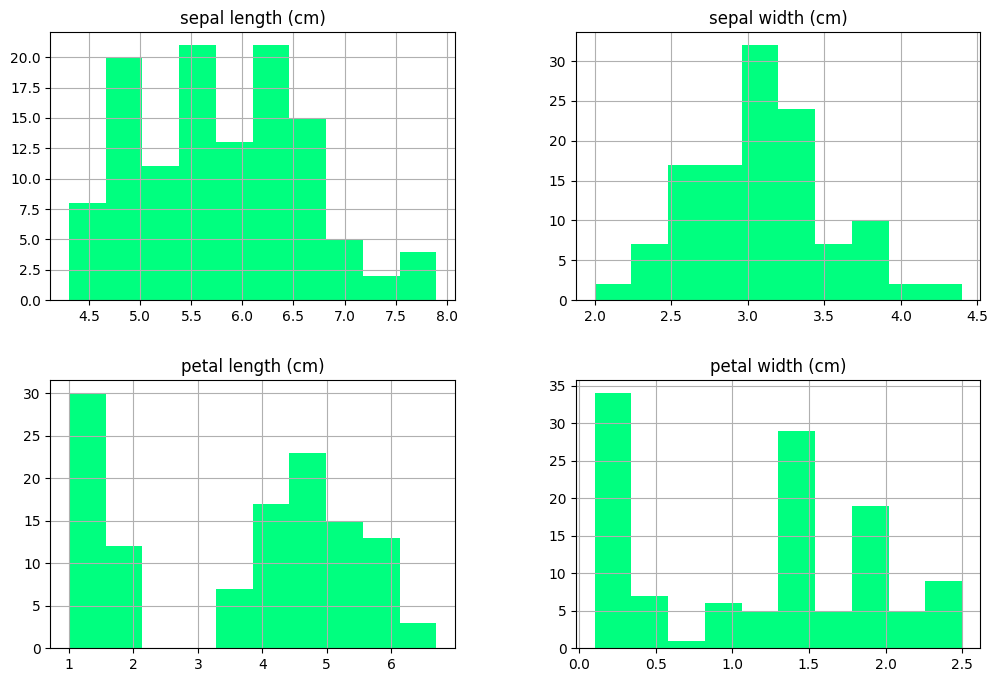

In [ ]:
numerical_attributes = traindata_original.select_dtypes(include=['float'])
numerical_attributes.hist(figsize=(12,8), color = 'SpringGreen')

##Testing Data

In [ ]:
testdata_original = pd.DataFrame(X_test, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
testdata_original.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,30.00,30.00,30.00,30.00
mean,6.04,2.99,4.20,1.37
std,0.87,0.42,1.90,0.81
min,4.40,2.20,1.30,0.20
25%,5.43,2.80,1.95,0.55
50%,6.00,3.00,4.85,1.40
75%,6.65,3.30,5.68,2.10
max,7.70,3.90,6.90,2.50


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

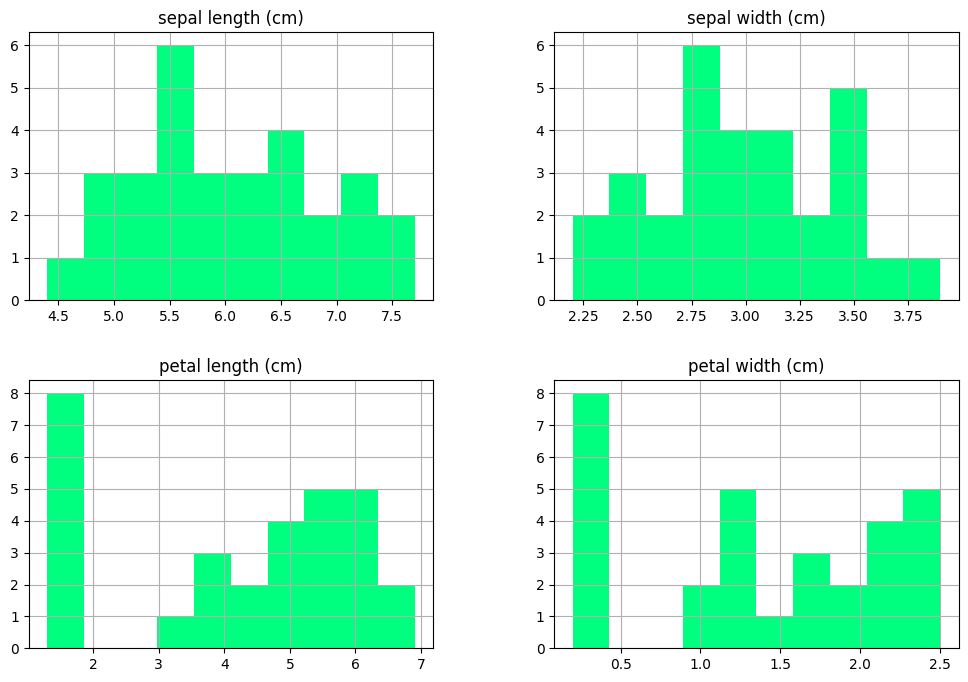

In [ ]:
numerical_attributes = testdata_original.select_dtypes(include=['float'])
numerical_attributes.hist(figsize=(12,8), color = 'SpringGreen')

#Train the 1st Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

##Check accuracy

In [ ]:
model.score(X_test,y_test)

0.9666666666666667

##Visualising the model

In [ ]:
def add_label(ax):
  for label in ax.containers:
    ax.bar_label(label)

<ipython-input-35-0fabd5d74784>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  m = sns.barplot(x=col_name, y=[i*100 for i in feature_importances], palette='rocket')


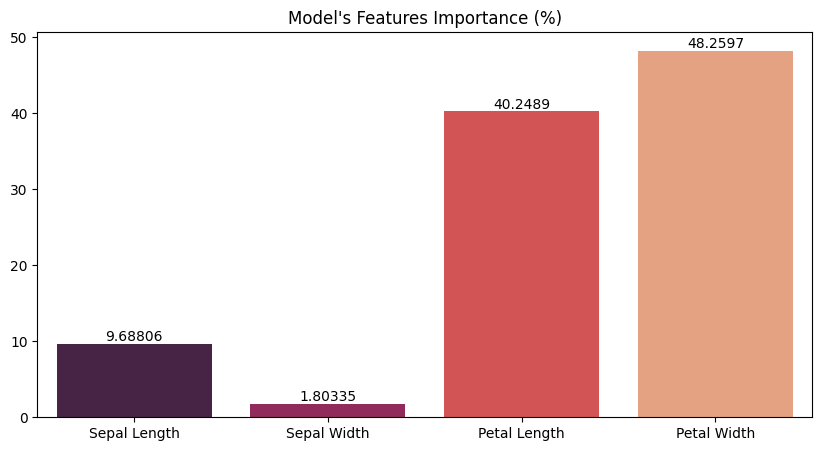

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

plt.figure(figsize=(10, 5))
plt.title("Model's Features Importance (%)")
m = sns.barplot(x=col_name, y=[i*100 for i in feature_importances], palette='rocket')
add_label(m)
plt.show()

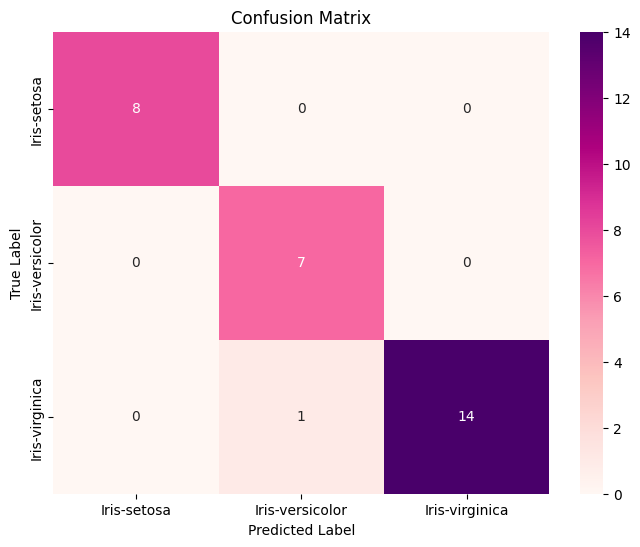

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu", xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Train the 2nd Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, criterion='entropy', class_weight="balanced",min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=4, n_estimators=300)

##Check accuracy

In [ ]:
model.score(X_test,y_test)

0.9333333333333333

##Visualising the model

In [ ]:
def add_label(ax):
  for label in ax.containers:
    ax.bar_label(label)

<ipython-input-30-0fabd5d74784>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  m = sns.barplot(x=col_name, y=[i*100 for i in feature_importances], palette='rocket')


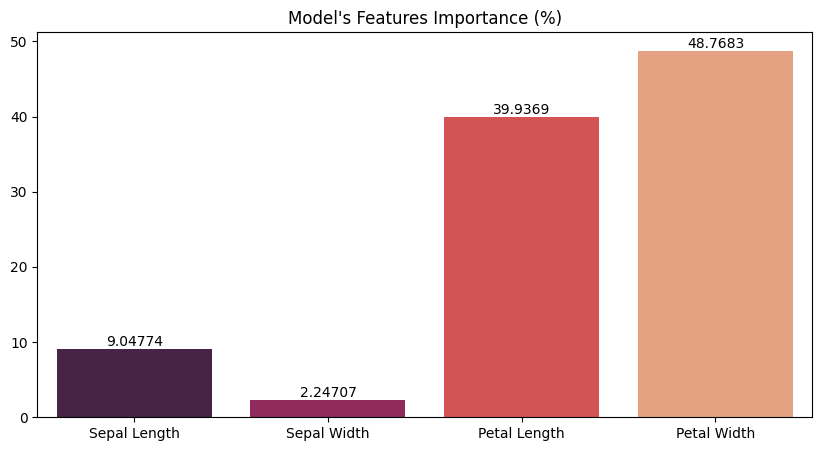

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

plt.figure(figsize=(10, 5))
plt.title("Model's Features Importance (%)")
m = sns.barplot(x=col_name, y=[i*100 for i in feature_importances], palette='rocket')
add_label(m)
plt.show()

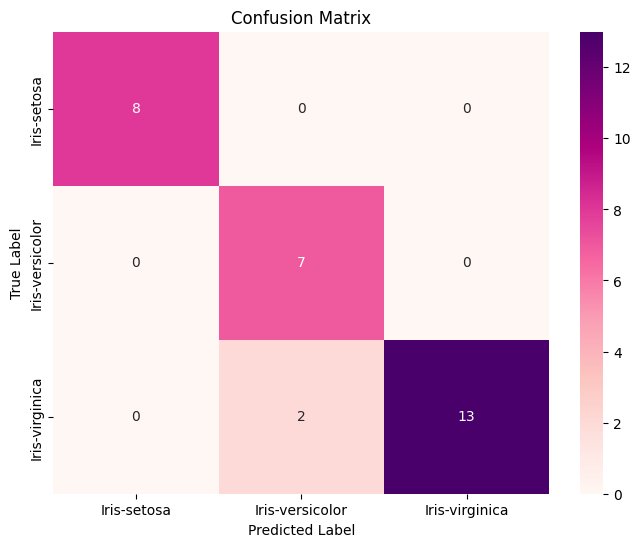

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu", xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()